# Klasifikasi

---

Klasifikasi adalah salah satu jenis masalah dalam pembelajaran mesin yang melibatkan penempatan objek data ke dalam kelas atau kategori tertentu berdasarkan atribut atau fitur-fitur tertentu yang dimilikinya. Dalam konteks ini, pengeritian klasifikasi merujuk pada proses lengkap dari persiapan data hingga evaluasi model klasifikasi. Berikut adalah pengeritian klasifikasi secara umum:

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import plotly.graph_objects as go

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Import Dataset

---
Mulailah dengan mengimpor dataset yang akan digunakan untuk membangun model klasifikasi. Dataset ini biasanya terdiri dari kumpulan data yang memiliki fitur atau atribut serta label kelas yang sesuai.

In [2]:
# Import dataset
data = pd.read_csv("stellar_classification.csv")
data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [3]:
# Visualize data distribution
total = len(data)
star = data["class"].value_counts()
star = star.sort_index(ascending=False)
percentage = [str(round(value / total * 100, 2)) + "%" for value in star.values]
class_labels = [class_label for class_label in star.index]
trace0 = go.Bar(
    x=star.values,
    y=class_labels,
    orientation="h",
    text=star.index,
    texttemplate=percentage,
    textposition="outside",
    textfont_color="white",
    marker=dict(color=star.values, colorscale="OrRd"),
)
fig_data = [trace0]
fig = go.Figure(fig_data)
fig.update_layout(
    title="Classified Star",
    xaxis_title="Count",
    yaxis_title="Star",
    template="plotly_dark",
)
fig.show()

In [4]:
print(data.isnull().any())

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool


In [5]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Preprocessing
---
Lakukan preprocessing data untuk mempersiapkannya sebelum digunakan dalam pemodelan. Ini mungkin termasuk menghilangkan nilai-nilai yang hilang, menangani data yang tidak seimbang, dan mengkodekan variabel kategorikal menjadi bentuk yang dapat digunakan oleh model.

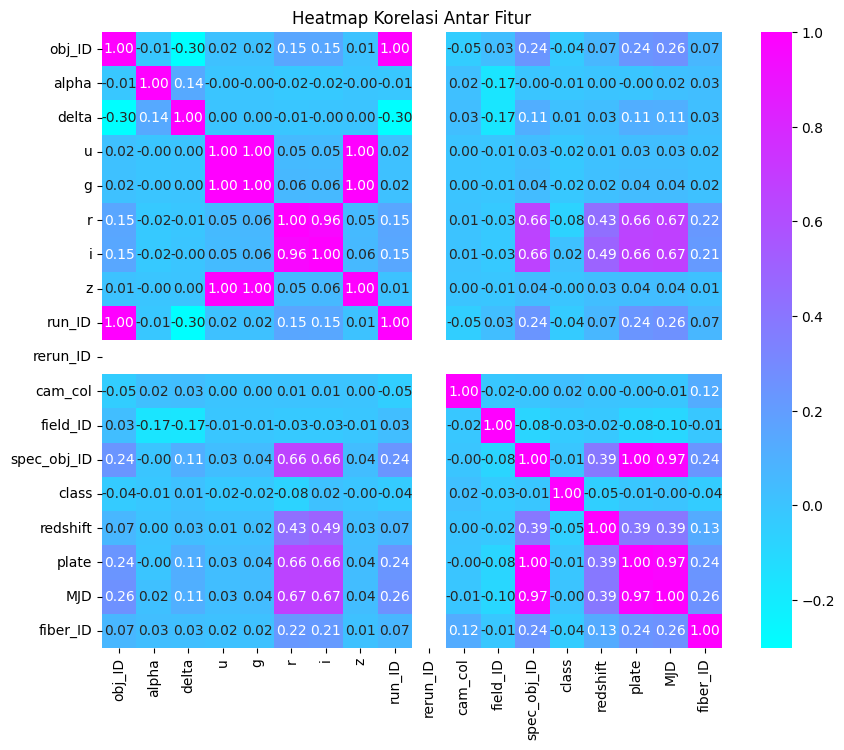

In [6]:
# Preprocessing
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data_korelasi = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_korelasi, annot=True, cmap="cool", fmt=".2f", annot_kws={"size": 10})
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [7]:
# Select relevant features
X = data.drop(
    columns=[
        "class",
        "alpha",
        "delta",
        "r",
        "plate",
        "spec_obj_ID",
        "redshift",
        "MJD",
        "cam_col",
        "plate",
        "fiber_ID",
    ]
)
y = data["class"]

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print("Remaining columns after dropping specified columns:")
print(X.columns)

Remaining columns after dropping specified columns:
Index(['obj_ID', 'u', 'g', 'i', 'z', 'run_ID', 'rerun_ID', 'field_ID'], dtype='object')


### Modeling & Training Dataset
---

In [10]:
# Model definitions
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Kernel SVM': SVC(kernel='rbf')
}
# Model evaluation setup
scores = {}
reports = {}
f1_scores = {}
precision_scores = {}
recall_scores = {}

### K-Fold Model
---

In [11]:
# K-Fold Cross Validation
num_folds = 5
cross_val_results = []
kfold = KFold(n_splits=num_folds)

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict the test set

    # Calculate and store evaluation metrics
    scores[name] = accuracy_score(y_test, y_pred)
    reports[name] = classification_report(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')

    # Store cross-validation scores for each fold
    fold_accuracies = {'Fold ' + str(i+1): score for i, score in enumerate(cv_scores)}
    mean_accuracy = cv_scores.mean()
    std_accuracy = cv_scores.std()
    cross_val_results.append({'Algorithm': name, 'Mean Accuracy': mean_accuracy, 'Standard Deviation': std_accuracy, **fold_accuracies})

cross_val_df = pd.DataFrame(cross_val_results)
columns_order = ['Algorithm'] + [col for col in cross_val_df.columns if col != 'Algorithm']
cross_val_df = cross_val_df[columns_order]
cross_val_df_sorted = cross_val_df.sort_values('Mean Accuracy', ascending=False).reset_index(drop=True)
cross_val_df_sorted


,Algorithm,Mean Accuracy,Standard Deviation,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0,Decision Tree,0.79222,0.003119,0.78915,0.7936,0.79165,0.78920,0.79750
1,Naive Bayes,0.59445,0.005688,0.58910,0.5880,0.60175,0.60045,0.59295
2,SVM,0.59445,0.005688,0.58910,0.5880,0.60175,0.60045,0.59295
3,Kernel SVM,0.59445,0.005688,0.58910,0.5880,0.60175,0.60045,0.59295
4,KNN,0.57209,0.046344,0.50980,0.5903,0.62205,0.61395,0.52435


### Ensemble Learning
---
Ensemble Learning adalah teknik yang menggabungkan hasil dari beberapa model individu untuk meningkatkan performa prediksi. Dua pendekatan ensemble yang umum adalah Voting dan Stacking.

In [12]:
# Ensemble Learning
ensemble = StackingClassifier(estimators=list(models.items()))
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
ensemble_score = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1_score = f1_score(y_test, y_pred_ensemble, average='weighted')
ensemble_precision_score = precision_score(y_test, y_pred_ensemble, average='weighted')
ensemble_recall_score = recall_score(y_test, y_pred_ensemble, average='weighted')
ensemble_report = classification_report(y_test, y_pred_ensemble)

# K-Fold Cross Validation for Ensemble Learning
cv_scores = cross_val_score(ensemble, X, y, cv=kfold)
print("Skor Akurasi Cross Validation untuk Ensemble Learning:")
print(cv_scores)
print(f"Rata-rata Skor Akurasi: {cv_scores.mean()}")

# Display ensemble results
print(f"\nEnsemble Stacking:\nAccuracy Score: {ensemble_score:.3f}\nF1 Score: {ensemble_f1_score:.3f}\nPrecision Score: {ensemble_precision_score:.3f}\nRecall Score: {ensemble_recall_score:.3f}\nClassification Report:\n{ensemble_report}")

KeyboardInterrupt: 

### Visualisasi Data
---

In [ ]:
# Visualize predictions vs actual for each model
def plot_category_distribution_bar_with_accuracy(model, X_test, y_test, model_name, accuracy_score):
    y_pred = model.predict(X_test)
    y_test_labels = np.array(['Bintang', 'Galaksi', 'Quasar'])[y_test]
    y_pred_labels = np.array(['Bintang', 'Galaksi', 'Quasar'])[y_pred]
    
    category_counts = pd.crosstab(index=y_pred_labels, columns=y_test_labels)
    
    ax = category_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Kategori Prediksi')
    plt.ylabel('Jumlah')
    plt.title(f'Distribusi Kategori Prediksi vs Kategori Sebenarnya \n {model_name} (Akurasi: {accuracy_score:.3f})')
    plt.xticks(rotation=0)
    plt.legend(title='Kategori Sebenarnya', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

for name, model in models.items():
    plot_category_distribution_bar_with_accuracy(model, X_test, y_test, name, scores[name])

plot_category_distribution_bar_with_accuracy(ensemble, X_test, y_test, 'Ensemble Learning Stacking', ensemble_score)

## Deep Learning Model
---

In [ ]:
# Deep Learning Model
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_data=(X_test, y_test_nn), verbose=1)

### Evaluasi Model
---

In [ ]:
# Evaluate the neural network
nn_scores = model.evaluate(X_test, y_test_nn, verbose=0)
nn_accuracy = nn_scores[1]
print(f"Neural Network Accuracy: {nn_accuracy:.3f}")

# Generate classification report for neural network
y_pred_nn = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_nn, axis=1)
nn_f1_score = f1_score(y_test, y_pred_classes, average='weighted')
nn_precision_score = precision_score(y_test, y_pred_classes, average='weighted')
nn_recall_score = recall_score(y_test, y_pred_classes, average='weighted')
nn_report = classification_report(y_test, y_pred_classes)
print(f"\nNeural Network Classification Report:\n{nn_report}")

### Visualisasi data Deep Learning
---

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Komparasi Hasil dari Setiap Algoritma
---

In [ ]:
# Compare accuracies of models
model_comparison = pd.DataFrame({
    'Model': list(scores.keys()) + ['Neural Network', 'Ensemble Stacking'],
    'Accuracy': list(scores.values()) + [nn_accuracy, ensemble_score],
    'F1 Score': list(f1_scores.values()) + [nn_f1_score, ensemble_f1_score],
    'Precision': list(precision_scores.values()) + [nn_precision_score, ensemble_precision_score],
    'Recall': list(recall_scores.values()) + [nn_recall_score, ensemble_recall_score]
})

model_comparison_sorted = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print(model_comparison_sorted)

# Display classification reports for each model
for name, report in reports.items():
    print(f"\n{name} Classification Report:\n{report}")
print(f"\nNeural Network Classification Report:\n{nn_report}")
print(f"\nEnsemble Stacking Classification Report:\n{ensemble_report}")

# Plot confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bintang', 'Galaksi', 'Quasar'], yticklabels=['Bintang', 'Galaksi', 'Quasar'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

plot_confusion_matrix(y_test, y_pred_ensemble, 'Ensemble Stacking')
plot_confusion_matrix(y_test, y_pred_classes, 'Neural Network')